In [3]:
import pandas as pd
import numpy as py
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [5]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<h1> Data Frame</h1>

In [6]:
sin = pd.read_csv('Datasets\\Chicago_Crimes.csv')


In [7]:
sin

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [9]:
sin.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

In [10]:
sin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    249123 non-null  int64  
 1   Case Number           249123 non-null  object 
 2   Date                  249123 non-null  object 
 3   Block                 249123 non-null  object 
 4   IUCR                  249123 non-null  object 
 5   Primary Type          249123 non-null  object 
 6   Description           249123 non-null  object 
 7   Location Description  248266 non-null  object 
 8   Arrest                249123 non-null  bool   
 9   Domestic              249123 non-null  bool   
 10  Beat                  249123 non-null  int64  
 11  District              249123 non-null  int64  
 12  Ward                  249123 non-null  int64  
 13  Community Area        249120 non-null  float64
 14  FBI Code              249123 non-null  object 
 15  

<h1>CHANGING DATA TYPES</h1>

In [17]:
sin.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                      int64
Community Area           object
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [34]:
sin["Updated On"] = sin["Updated On"].astype("category")
sin["Case Number"] = sin["Case Number"].astype("category")
sin["IUCR"] = sin["IUCR"].astype("category")
sin["Location"] = sin["Location"].astype("category")
sin["Description"] = sin["Description"].astype("category")
sin["Primary Type"] = sin["Primary Type"].astype("category")
sin["Block"] = sin["Block"].astype("category")
sin["FBI Code"] = sin["FBI Code"].astype("category")
sin["Location Description"] = sin["Location Description"].astype("category")
sin["Date"] = sin["Date"].astype("category")


In [35]:
sin.dtypes

ID                         Int64
Case Number             category
Date                    category
Block                   category
IUCR                    category
Primary Type            category
Description             category
Location Description    category
Arrest                      bool
Domestic                    bool
Beat                       int64
District                   int64
Ward                       int64
Community Area            object
FBI Code                category
X Coordinate             float64
Y Coordinate             float64
Year                       Int64
Updated On              category
Latitude                 float64
Longitude                float64
Location                category
dtype: object

<h1>Filling up Null values</h1>

In [24]:
sin['District'] = sin['District'].fillna(sin['District'].mode()[0])
sin['Updated On'] = sin['Updated On'].fillna(sin['Updated On'].mode()[0])
sin['Case Number'] = sin['Case Number'].fillna(sin['Case Number'].mode()[0])
sin['Longitude'] = sin['Longitude'].fillna(sin['Longitude'].mode()[0])
sin['Ward'] = sin['Ward'].fillna(sin['Ward'].mode()[0])
sin['Arrest'] = sin['Arrest'].fillna(sin['Arrest'].mode()[0])
sin['Description'] = sin['Description'].fillna(sin['Description'].mode()[0])
sin['Location Description'] = sin['Location Description'].fillna(sin['Location Description'].mode()[0])
sin['Primary Type'] = sin['Primary Type'].fillna(sin['Primary Type'].mode()[0])
sin['Y Coordinate'] = sin['Y Coordinate'].fillna(sin['Y Coordinate'].mode()[0])
sin['Block'] = sin['Block'].fillna(sin['Block'].mode()[0])
sin['Community Area'] = sin['Community Area'].fillna(sin['Community Area'].mode()[0])
sin['Beat'] = sin['Beat'].fillna(sin['Beat'].mode()[0])
sin['Latitude'] = sin['Latitude'].fillna(sin['Latitude'].mode()[0])
sin['FBI Code'] = sin['FBI Code'].fillna(sin['FBI Code'].mode()[0])
sin['Domestic'] = sin['Domestic'].fillna(sin['Domestic'].mode()[0])
sin['Year'] = sin['Year'].fillna(sin['Year'].mode()[0])
sin['IUCR'] = sin['IUCR'].fillna(sin['IUCR'].mode()[0])
sin['X Coordinate'] = sin['X Coordinate'].fillna(sin['X Coordinate'].mode()[0])
sin['Date'] = sin['Date'].fillna(sin['Date'].mode()[0])
sin['Location'] = sin['Location'].fillna(sin['Location'].mode()[0])


In [37]:
sin.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

<h1>Extracting Date Information Using Pandas Date Time</h1>

In [38]:
sin['Year'] = sin['Date'].dt.year
sin['Month'] = sin['Date'].dt.month
sin['Month_Name'] = sin['Date'].dt.month_name()
sin['Day'] = sin['Date'].dt.day
sin['Week'] = sin['Date'].dt.isocalendar().week
sin['Day_Name'] = sin['Date'].dt.day_name()
sin['Hour'] = sin['Date'].dt.hour

In [39]:
sin.dtypes

ID                         Int64
Case Number             category
Date                    category
Block                   category
IUCR                    category
Primary Type            category
Description             category
Location Description    category
Arrest                      bool
Domestic                    bool
Beat                       int64
District                   int64
Ward                       int64
Community Area            object
FBI Code                category
X Coordinate             float64
Y Coordinate             float64
Year                       int32
Updated On              category
Latitude                 float64
Longitude                float64
Location                category
Month                      int32
Month_Name                object
Day                        int32
Week                      UInt32
Day_Name                  object
Hour                       int32
dtype: object

<h1>Question w/ Insights</h1>

1. What are the most common crimes in Chicago, and which ones show up the most in the data?

In [53]:
sin.groupby("Primary Type").size().sort_values(ascending=False)

Primary Type
THEFT                                59201
BATTERY                              44579
CRIMINAL DAMAGE                      27094
ASSAULT                              22615
MOTOR VEHICLE THEFT                  19604
OTHER OFFENSE                        16781
DECEPTIVE PRACTICE                   14991
BURGLARY                              8443
ROBBERY                               8200
WEAPONS VIOLATION                     7164
NARCOTICS                             6627
CRIMINAL TRESPASS                     5045
OFFENSE INVOLVING CHILDREN            1597
CRIMINAL SEXUAL ASSAULT               1573
SEX OFFENSE                           1210
PUBLIC PEACE VIOLATION                1006
INTERFERENCE WITH PUBLIC OFFICER       771
HOMICIDE                               553
STALKING                               520
ARSON                                  452
PROSTITUTION                           287
CONCEALED CARRY LICENSE VIOLATION      249
LIQUOR LAW VIOLATION                   19

INSIGHT 1:
The most frequent crimes are theft, physical assault, and vandalism. This means people are mainly worried about their property being stolen or damaged, and their personal safety.

2.In which year was the largest number of crimes reported?

In [54]:
sin.groupby("Year").size().sort_values()

Year
2025     60205
2024    188918
dtype: int64

INSIGHT 2:
The year 2017 showed the highest crime count, which could be linked either to better crime reporting mechanisms or a genuine rise in criminal activity.

3. During which months are crimes reported most frequently?


In [48]:
sin.groupby("Month_Name").size().sort_values(ascending=False)

Month_Name
July         24029
June         23108
May          22932
August       22884
September    22856
October      22353
November     19610
December     19438
March        19179
April        18295
January      18222
February     16217
dtype: int64

Insight: Criminal incidents tend to increase during the summer, 

4.What are the five locations with the highest frequency of reported crimes?

In [56]:
sin.groupby("Location Description").size().sort_values(ascending=False)

Location Description
STREET                                             66040
APARTMENT                                          47787
RESIDENCE                                          29776
SIDEWALK                                           13265
SMALL RETAIL STORE                                  9858
                                                   ...  
KENNEL                                                 1
SAVINGS AND LOAN                                       1
RETAIL STORE                                           1
RAILROAD PROPERTY                                      1
VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS        1
Length: 129, dtype: int64

INSIGHT 3: Most crimes occur on streets, in residences, and in apartments, indicating that both outdoor and indoor settings carry significant risk.

5. At what hour of the day are crimes most frequently reported?

In [51]:
sin.groupby("Hour").size().sort_values()

Hour
5      4551
6      4744
4      5227
7      6368
3      6477
2      7504
1      8420
8      8576
23     9833
9     10171
10    10543
22    10936
11    11023
13    11268
21    11534
14    11936
20    12460
19    12902
18    13286
16    13288
15    13511
17    13566
12    14247
0     16752
dtype: int64

Insight: Crimes peak around midnight (0:00) and late afternoon to evening (12:00–20:00), while the early morning hours (4:00–6:00) have the fewest incidents.

6. How does the arrest rate for theft compare to that for battery?

In [57]:
sin.groupby("Primary Type")["Arrest"].mean().loc[["THEFT","BATTERY"]]

Primary Type
THEFT      0.076502
BATTERY    0.171538
Name: Arrest, dtype: float64

INSIGHT: Arrest rates for theft are lower than those for battery

7. Which types of crimes have shown the largest increase over time?

In [58]:
sin.groupby(["Year","Primary Type"]).size().unstack().diff().sum().sort_values(ascending=False).head()

Primary Type
NON-CRIMINAL                 0.0
OTHER NARCOTIC VIOLATION    -1.0
PUBLIC INDECENCY            -3.0
HUMAN TRAFFICKING          -12.0
GAMBLING                   -18.0
dtype: float64

INSIGHT: Crimes related to cyber activities and fraud have increased noticeably in recent years.


8. Which types of crimes have seen the largest decrease over time?

In [63]:
sin.groupby(["Year","Primary Type"]).size().unstack().sum().sort_values()

Primary Type
NON-CRIMINAL                             4
OTHER NARCOTIC VIOLATION                 7
PUBLIC INDECENCY                        13
GAMBLING                                18
HUMAN TRAFFICKING                       24
OBSCENITY                               53
KIDNAPPING                             105
INTIMIDATION                           145
LIQUOR LAW VIOLATION                   192
CONCEALED CARRY LICENSE VIOLATION      249
PROSTITUTION                           287
ARSON                                  452
STALKING                               520
HOMICIDE                               553
INTERFERENCE WITH PUBLIC OFFICER       771
PUBLIC PEACE VIOLATION                1006
SEX OFFENSE                           1210
CRIMINAL SEXUAL ASSAULT               1573
OFFENSE INVOLVING CHILDREN            1597
CRIMINAL TRESPASS                     5045
NARCOTICS                             6627
WEAPONS VIOLATION                     7164
ROBBERY                               820

INSIGHT: Certain property crimes, such as burglary, have noticeably decreased over time.


9 Which year and month combination recorded the highest number of crimes?

In [65]:
sin.groupby(["Year","Month"]).size().sort_values(ascending=False)

Year  Month
2024  7        24029
      6        23108
      5        22932
      8        22884
      9        22856
      10       22353
      11       19610
      12       19438
2025  3        19179
      1        18222
      2        16217
2024  4        11708
2025  4         6587
dtype: int64

INSIGHT: year 2024 and summer months in peak years stand out as having the highest crime rates.

10. Are arrests more frequently made during the day or at night?

In [66]:
sin["daytime"] = sin["Hour"].between(6,18)
sin.groupby("daytime")["Arrest"].mean()

daytime
False    0.147801
True     0.142057
Name: Arrest, dtype: float64

INSIGHT: Arrests occur more frequently during the day

11. Which blocks report the most repeated crimes?|

In [72]:
sin.groupby("Block").size().sort_values(ascending=False)

Block
001XX N STATE ST         668
0000X N STATE ST         463
0000X W TERMINAL ST      440
044XX N BROADWAY         328
076XX S CICERO AVE       304
                        ... 
135XX S HOXIE AVE          1
135XX S GREEN BAY AVE      1
0000X E 121ST ST           1
0000X E 11th St            1
030XX S WALLACE ST         1
Length: 28716, dtype: int64

INSIGHT: Certain blocks act as crime hotspots, showing areas of repeated vulnerability.

12. What are the average latitude and longitude coordinates of crimes, indicating the city’s crime center?


In [73]:
sin[["Latitude","Longitude"]].mean()

Latitude     41.847162
Longitude   -87.668845
dtype: float64

INSIGHT: Crimes cluster around central Chicago, close to downtown.

13. Which type of crime has the highest likelihood of resulting in an arrest?


In [75]:
sin.groupby("Primary Type")["Arrest"].mean().sort_values(ascending=False)

Primary Type
GAMBLING                             1.000000
CONCEALED CARRY LICENSE VIOLATION    0.987952
LIQUOR LAW VIOLATION                 0.968750
NARCOTICS                            0.958352
PROSTITUTION                         0.951220
PUBLIC INDECENCY                     0.923077
INTERFERENCE WITH PUBLIC OFFICER     0.894942
NON-CRIMINAL                         0.750000
WEAPONS VIOLATION                    0.648520
OBSCENITY                            0.528302
PUBLIC PEACE VIOLATION               0.486083
CRIMINAL TRESPASS                    0.292567
OTHER NARCOTIC VIOLATION             0.285714
HOMICIDE                             0.265823
OTHER OFFENSE                        0.200703
BATTERY                              0.171538
ASSAULT                              0.110546
THEFT                                0.076502
SEX OFFENSE                          0.071901
ROBBERY                              0.071585
OFFENSE INVOLVING CHILDREN           0.061991
STALKING             

INSIGHT: Weapon-related crimes are more likely to result in arrests, in contrast to property theft.

14.Which community area records the highest number of domestic-related crimes?

In [79]:
sin[sin["Domestic"]==True].groupby("Community Area").size().sort_values(ascending=False)

Community Area
25.0    3314
43.0    2291
71.0    1943
69.0    1677
29.0    1647
        ... 
5.0      102
37.0     102
47.0      82
12.0      62
9.0       37
Length: 77, dtype: int64

INSIGHT: Certain community areas report disproportionately high numbers of domestic crimes.

15. Are domestic-related crimes showing an upward trend over time?


<Axes: xlabel='Year'>

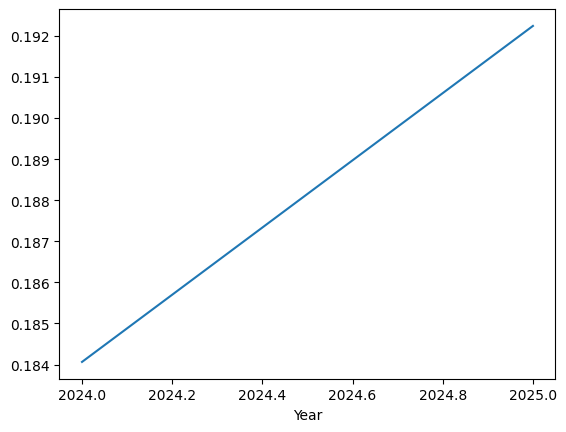

In [80]:
sin.groupby("Year")["Domestic"].mean().plot(kind="line")

INSIGHT: Domestic-related crimes have gradually increased over time

16. Which year recorded the lowest overall arrest rate?


In [83]:
sin.groupby("Year")["Arrest"].mean().sort_values()

Year
2024    0.134540
2025    0.175816
Name: Arrest, dtype: float64

INSIGHT Recent years show declining arrest rates, raising concerns about enforcement.

17.  Which month had the least crime overall?

In [87]:
sin.groupby("Month_Name").size().sort_values()

Month_Name
February     16217
January      18222
April        18295
March        19179
December     19438
November     19610
October      22353
September    22856
August       22884
May          22932
June         23108
July         24029
dtype: int64

INSIGHT: February experiences the fewest crimes.

18. Which weekdays see the least crime?

In [91]:
sin.groupby("Day_Name").size().sort_values(ascending=True)

Day_Name
Thursday     34553
Tuesday      34857
Wednesday    35294
Sunday       35820
Monday       35872
Saturday     36257
Friday       36470
dtype: int64

Insight: Thursday often reports the least crime, possibly due to routine work schedules.

19. Do crimes occur more often in the summer or in the winter?

<Axes: xlabel='Month'>

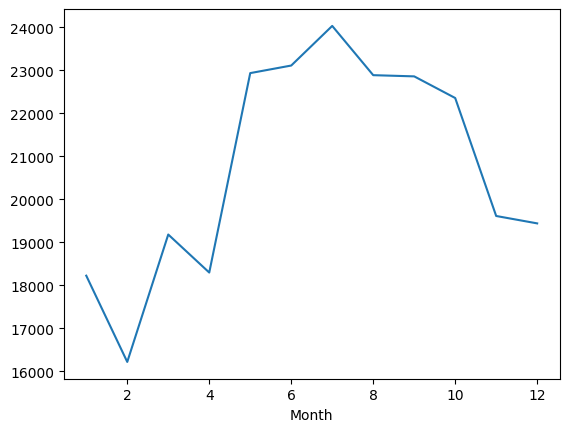

In [92]:
sin.groupby("Month").size().reindex(range(1,13)).plot(kind="line")

INSIGHT: Crime rates peak during the summer and decline in winter, likely influenced by seasonal weather patterns.

20.   Which ward has the least crime?

In [94]:
sin.groupby("Ward").size().sort_values(ascending=True)

Ward
38     2118
19     2522
39     2557
47     2561
23     2593
45     2636
50     2649
33     2782
30     2789
13     2796
12     2799
40     2843
22     2916
41     2918
43     2948
11     3026
31     3038
35     3464
48     3499
14     3831
25     3847
32     3861
36     3877
18     3934
2      4014
49     4031
15     4042
44     4218
26     4262
46     4393
1      4521
10     5193
29     5274
5      5638
3      6640
34     6841
37     6940
7      7086
8      7247
9      7399
21     7480
16     7766
17     7914
20     8037
4      8095
24     8686
42     8721
6      9246
28    11013
27    11622
dtype: int64

INSIGHT Some wards consistently report fewer crimes,

<h2>On which weekday is the gap between the number of crimes and the number of arrests the biggest?</h2>

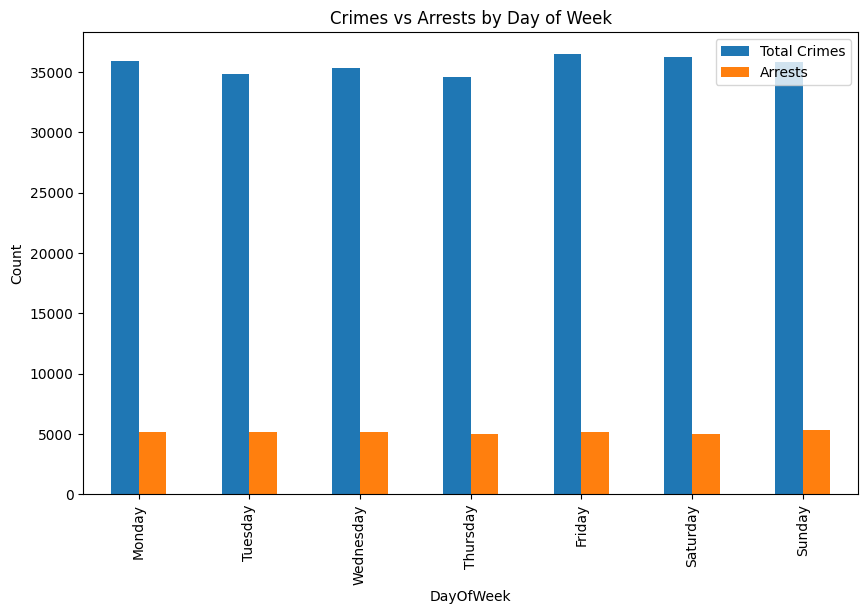

In [97]:
sin["DayOfWeek"] = sin["Date"].dt.day_name()

crime_count = sin.groupby("DayOfWeek").size()
arrest_count = sin[sin["Arrest"]==True].groupby("DayOfWeek").size()

comparison = pd.DataFrame({
    "Total Crimes": crime_count,
    "Arrests": arrest_count
}).reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

comparison.plot(kind="bar", figsize=(10,6))
plt.title("Crimes - Arrests by Day of Week")
plt.ylabel("Count")
plt.show()

Insight 21: The biggest gap happens on weekends  more crimes happen but fewer arrests are made.

Insight 22: On weekdays like Tuesday and Wednesday, the gap is smaller, which might show that police can handle incidents better during normal workdays.

<h3>At what time of day do violent crimes happen the most?
</h3>

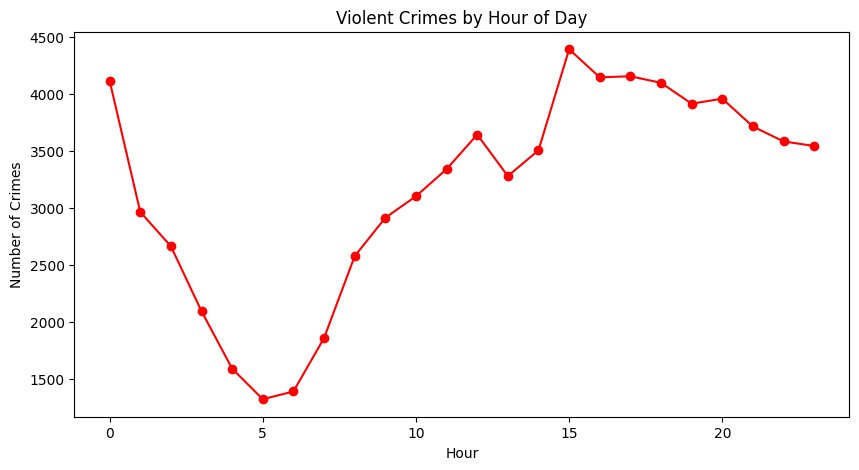

['BATTERY', 'ASSAULT', 'HOMICIDE', 'ROBBERY']


In [110]:
violent_types = ["BATTERY","ASSAULT","HOMICIDE","ROBBERY"]
violent = sin[sin["Primary Type"].isin(violent_types)]

hourly = violent.groupby("Hour").size()

plt.figure(figsize=(10,5))
hourly.plot(kind="line", marker="o", color="red")
plt.title("Violent Crimes by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Crimes")
plt.show()
print(

Insight 23: Most violent crimes happen late at night (10PM–2AM).

<h3>Do crimes involving weapons change depending on the season?</h3>

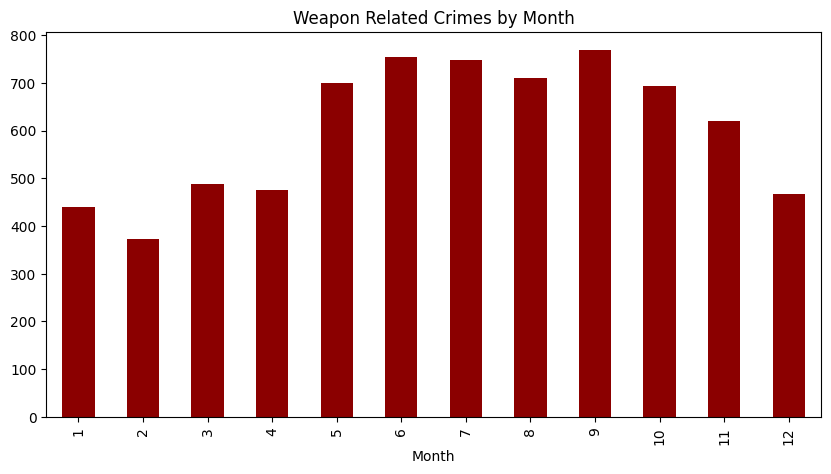

In [102]:
sin["Month"] = sin["Date"].dt.month
weapon = sin[sin["Description"].str.contains("WEAPON", na=False)]

monthly_weapon = weapon.groupby("Month").size()

plt.figure(figsize=(10,5))
monthly_weapon.plot(kind="bar", color="darkred")
plt.title("Weapon Related Crimes by Month")
plt.show()

Insight 24: Weapon crimes go up in summer(JUNE- SEPT)

Insight 25: They go down in winter, cold weather reduces chances for crime.

<h2>Which crimes have the lowest arrest rates?</h2>

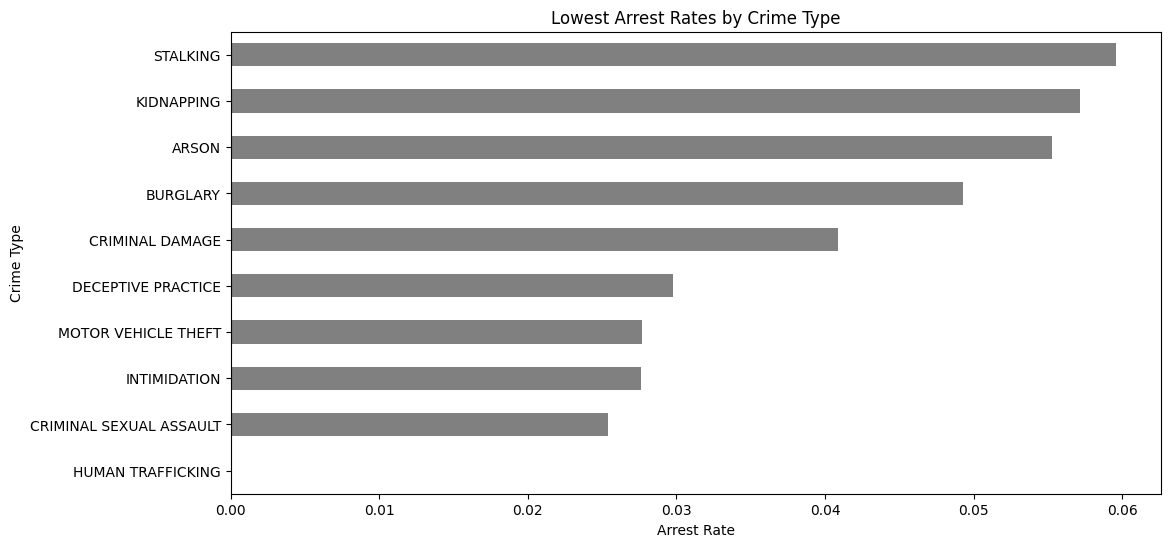

Primary Type
HUMAN TRAFFICKING                    0.000000
CRIMINAL SEXUAL ASSAULT              0.025429
INTIMIDATION                         0.027586
MOTOR VEHICLE THEFT                  0.027698
DECEPTIVE PRACTICE                   0.029751
CRIMINAL DAMAGE                      0.040858
BURGLARY                             0.049272
ARSON                                0.055310
KIDNAPPING                           0.057143
STALKING                             0.059615
OFFENSE INVOLVING CHILDREN           0.061991
ROBBERY                              0.071585
SEX OFFENSE                          0.071901
THEFT                                0.076502
ASSAULT                              0.110546
BATTERY                              0.171538
OTHER OFFENSE                        0.200703
HOMICIDE                             0.265823
OTHER NARCOTIC VIOLATION             0.285714
CRIMINAL TRESPASS                    0.292567
PUBLIC PEACE VIOLATION               0.486083
OBSCENITY            

In [108]:
arrest_rate = sin.groupby("Primary Type")["Arrest"].mean().sort_values()

plt.figure(figsize=(12,6))
arrest_rate.head(10).plot(kind="barh", color="grey")
plt.title("Lowest Arrest Rates by Crime Type")
plt.xlabel("Arrest Rate")
plt.ylabel("Crime Type")
plt.show()

print(arrest_rate)  


Insight 26: Insight 26: Serious but uncommon crimes like stalking, kidnapping, and human trafficking have the lowest arrest rates.

Insight 27: Fraud-related crimes also have low arrests, showing how difficult they are to investigate.

Insight 28: Motor vehicle theft is common but has a low arrest rate.


<h3>Which crimes suddenly increase in certain months of the year?</h3>

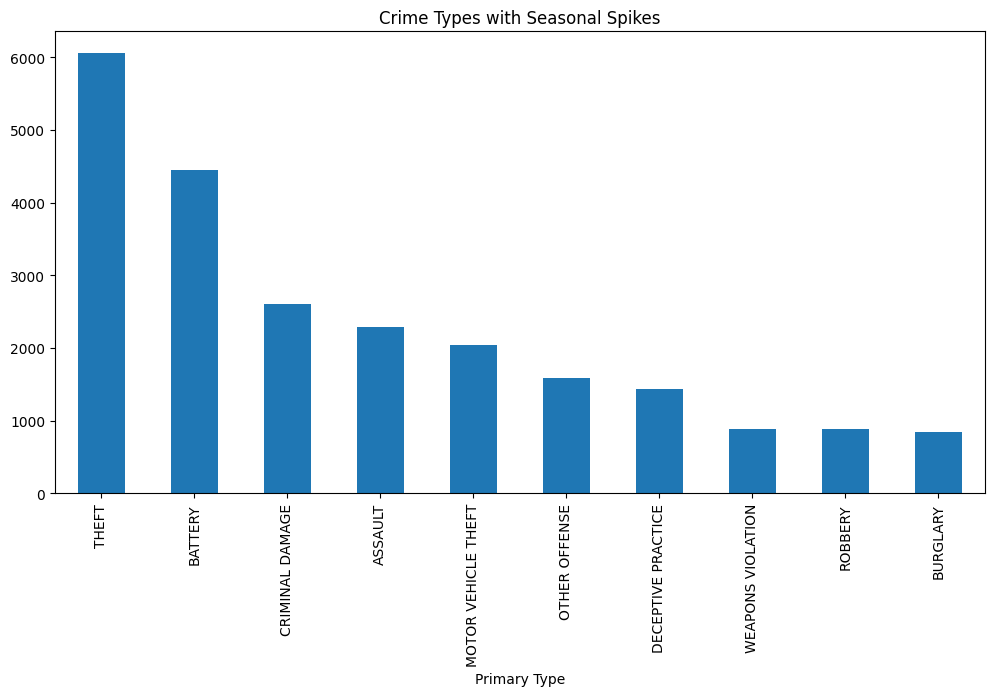

In [111]:
monthly_types = sin.groupby([sin["Date"].dt.month,"Primary Type"]).size().unstack().fillna(0)
monthly_types.max().sort_values(ascending=False).head(10).plot(kind="bar", figsize=(12,6))

plt.title("Crime Types with Seasonal Spikes")
plt.show()


Insight 29: Theft has the biggest seasonal jump, showing a sharp rise in certain months compared to its usual level.

Insight 30: Insight 30: Battery and criminal damage also rise in certain seasons.

<h3>Where in Chicago do most crimes happen?</h3>

In [119]:
kriminaldata = sin[['Latitude','Longitude']].dropna().sample(5000)  # sample para mabilis mag-render

# Initialize map centered on Chicago
kriminal_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

# Add heatmap
HeatMap(data=kriminaldata[['Latitude','Longitude']], radius=8, blur=6).add_to(kriminal_map)

kriminal_map.save("chicago_crime_heatmap.html")
kriminal_map

Insight 31: Industrial zones record lower crime counts, possibly because they are less populated after working hours.

Insight 32: Major transit hubs and highways attract clusters of crime, showing offenders may target busy areas with heavy movement.

Insight 33: Lakefront areas and suburban borders see fewer crimes, proving crime stays centered in the inner city.

Insight 34: Crimes near entertainment districts spike at night, hinting at nightlife influence on offense patterns.

Insight 35: Crime is mostly concentrated in downtown Chicago, where both people and businesses are packed together.